In [5]:
import pandas as pd

# Load the dataset
file_path = "/Electric_Vehicle_Population_Data.csv"
ev_data = pd.read_csv(file_path)

# Data Profiling

# Handling missing values in 'Electric Range' by filling with a default value (0)
ev_data['Electric Range'].fillna(0, inplace=True)

# Convert 'Electric Range' to integer after handling missing values
ev_data['Electric Range'] = ev_data['Electric Range'].astype(int)

# Display the summary of the dataset to confirm changes
ev_data['Electric Range'].describe()


print("Missing Values:\n", missing_values)
print("\nUnique Values:\n", unique_values)

# Convert necessary columns to appropriate data types
ev_data['Postal Code'] = ev_data['Postal Code'].astype(str)
ev_data['Model Year'] = ev_data['Model Year'].astype(int)
ev_data['Electric Range'] = ev_data['Electric Range'].astype(int)

# Transformations

# New Registrations by Year
registrations_by_year = ev_data['Model Year'].value_counts().sort_index()

# Geographical Distribution
geographical_distribution = ev_data['County'].value_counts()

# Model Popularity
model_popularity = ev_data['Model'].value_counts()

# CAFV Eligibility
cafv_eligibility = ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Impact on Electric Utilities
utility_impact = ev_data['Electric Utility'].value_counts()

# Display the results
print("\nNew Registrations by Year:\n", registrations_by_year)
print("\nGeographical Distribution:\n", geographical_distribution)
print("\nModel Popularity:\n", model_popularity)
print("\nCAFV Eligibility:\n", cafv_eligibility)
print("\nImpact on Electric Utilities:\n", utility_impact)


Missing Values:
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64



In [6]:
# Check for missing values
missing_values = ev_data.isnull().sum()

# Check for unique values
unique_values = ev_data.nunique()

# Display missing and unique values
print("Missing Values:\n", missing_values)
print("\nUnique Values:\n", unique_values)

Missing Values:
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64



In [7]:
# Convert necessary columns to appropriate data types
ev_data['Postal Code'] = ev_data['Postal Code'].astype(str)
ev_data['Model Year'] = ev_data['Model Year'].astype(int)
ev_data['Electric Range'] = ev_data['Electric Range'].astype(int)

# New Registrations by Year
registrations_by_year = ev_data['Model Year'].value_counts().sort_index()

# Geographical Distribution
geographical_distribution = ev_data['County'].value_counts()

# Model Popularity
model_popularity = ev_data['Model'].value_counts()

# CAFV Eligibility
cafv_eligibility = ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Impact on Electric Utilities
utility_impact = ev_data['Electric Utility'].value_counts()

# Display the results
print("New Registrations by Year:\n", registrations_by_year)
print("\nGeographical Distribution:\n", geographical_distribution)
print("\nModel Popularity:\n", model_popularity)
print("\nCAFV Eligibility:\n", cafv_eligibility)
print("\nImpact on Electric Utilities:\n", utility_impact)

New Registrations by Year:
 Model Year
1997        1
1999        4
2000        7
2002        2
2003        1
2008       22
2010       24
2011      707
2012     1549
2013     4331
2014     3507
2015     4741
2016     5474
2017     8662
2018    14386
2019    10872
2020    12241
2021    19837
2022    28465
2023    60161
2024    30030
2025      415
Name: count, dtype: int64

Geographical Distribution:
 County
King           105237
Snohomish       24721
Pierce          16197
Clark           12231
Thurston         7526
                ...  
Maui                1
Plaquemines         1
Burlington          1
Mobile              1
Christian           1
Name: count, Length: 205, dtype: int64

Model Popularity:
 Model
MODEL Y           43437
MODEL 3           32113
LEAF              13488
MODEL S            7881
BOLT EV            6727
                  ...  
A8 E                  2
PROMASTER 3500        2
918                   1
S-10 PICKUP           1
ESPRINTER             1
Name: count, Length:

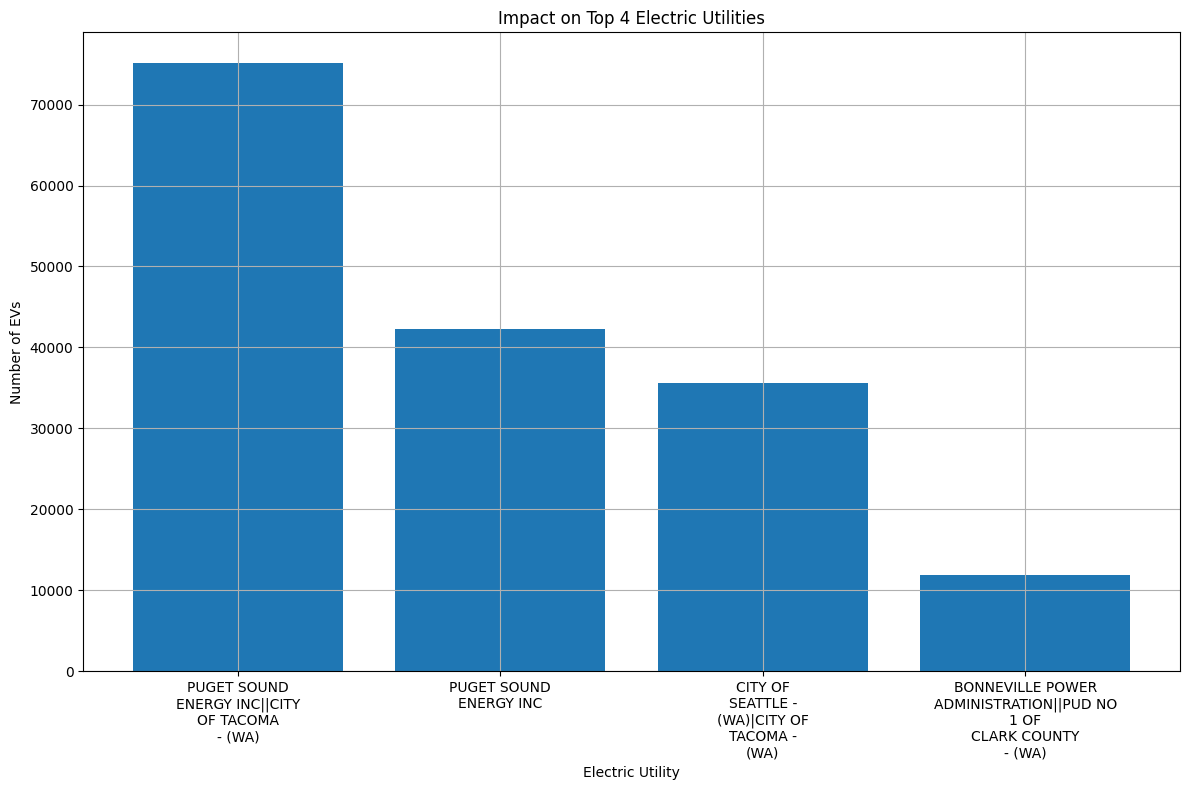

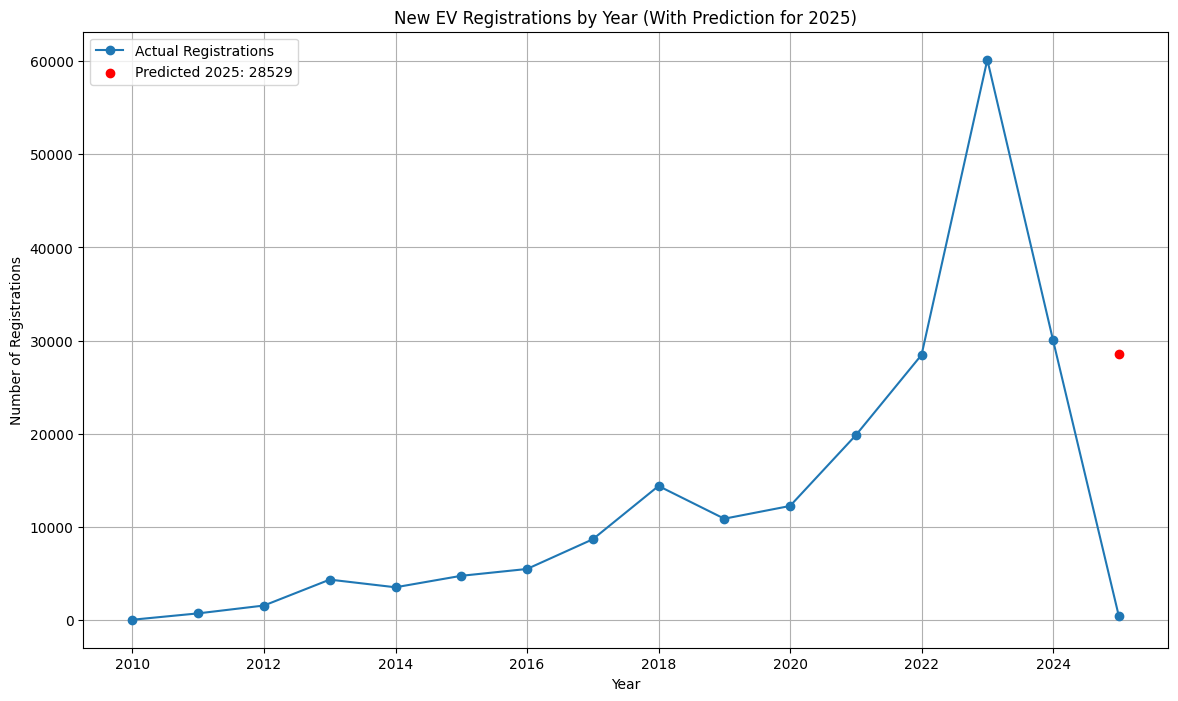

<ipython-input-15-c559e60161df>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_9_models['Short Model'] = top_9_models['Model'].apply(lambda x: ' '.join(x.split()[:2]) if len(x.split()) > 2 else x)


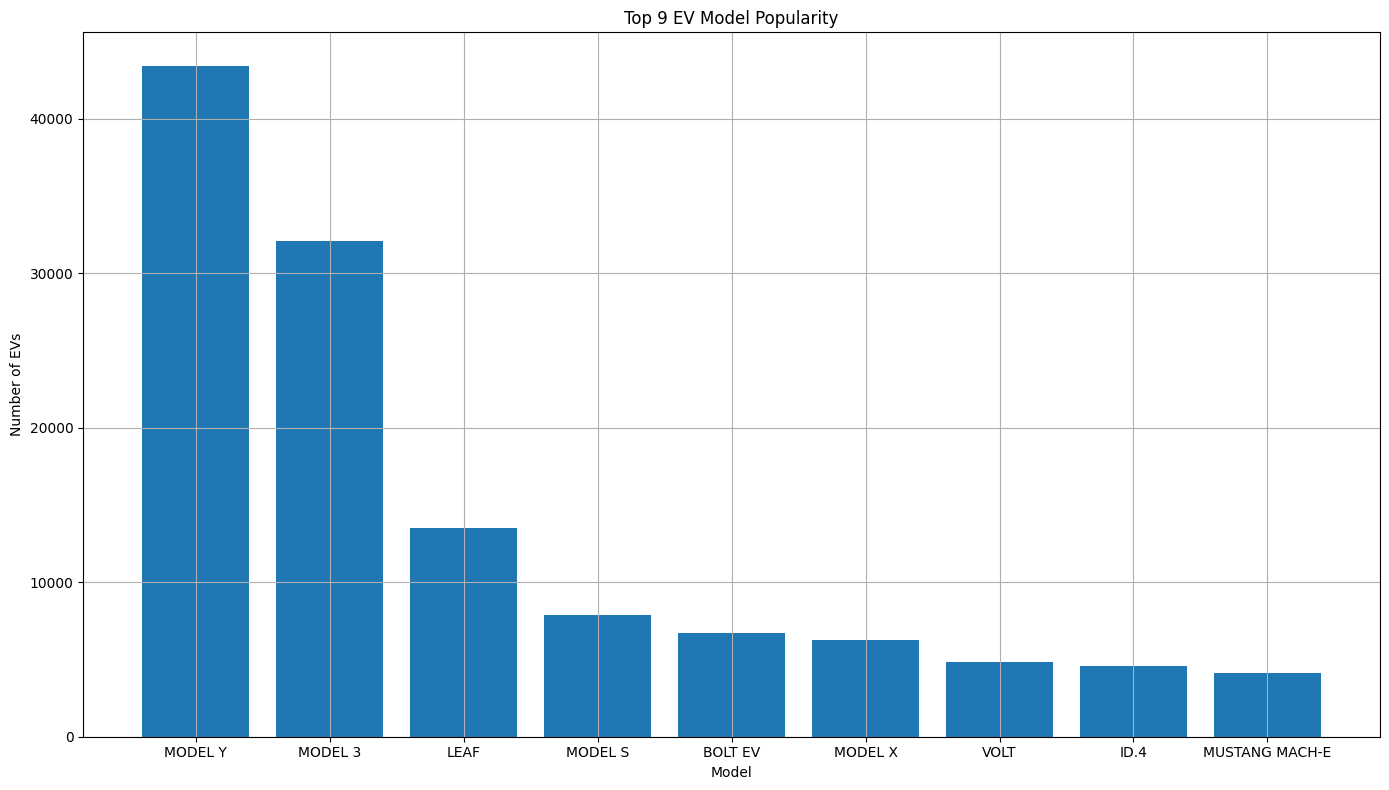

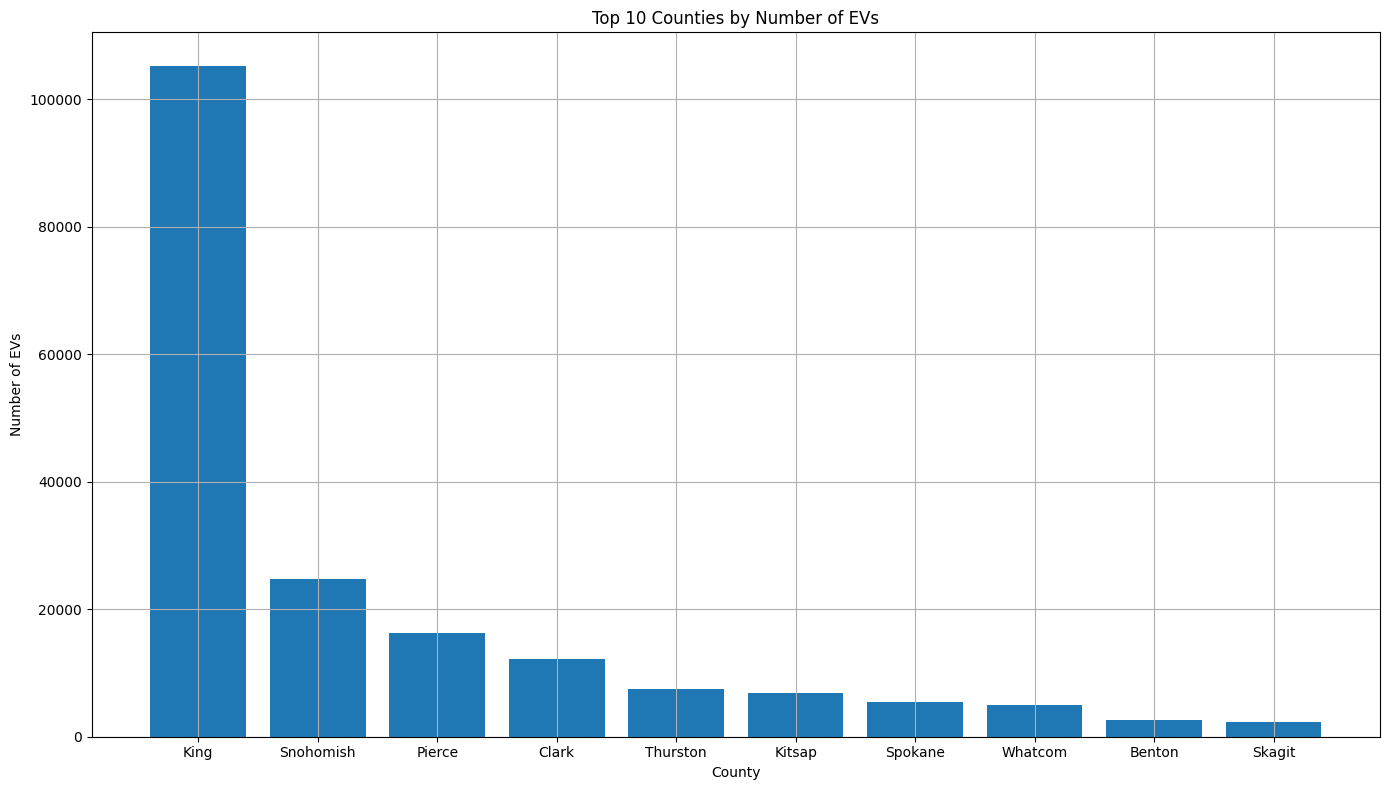

In [15]:
# Re-defining the function to split long labels into multiple lines for better readability

# Function to split long labels into multiple lines for better readability
def split_label_multi_line(label, max_words=2):
    words = label.split()
    return '\n'.join([' '.join(words[i:i + max_words]) for i in range(0, len(words), max_words)])

# 1. Visualization for Utility Impact (Top 4 Electric Utilities) with Multi-line Labels
top_4_utilities = utility_impact_df.nlargest(4, 'Count')

# Apply the label splitting function for multi-line formatting
top_4_utilities['Multi-line Utility'] = top_4_utilities['Electric Utility'].apply(lambda x: split_label_multi_line(x))

plt.figure(figsize=(12, 8))
plt.bar(top_4_utilities['Multi-line Utility'], top_4_utilities['Count'])
plt.title('Impact on Top 4 Electric Utilities')
plt.xlabel('Electric Utility')
plt.ylabel('Number of EVs')
plt.xticks(rotation=0)  # Perfectly horizontal labels
plt.tight_layout()
plt.grid(True)
plt.show()

# 2. Visualization for Registrations by Year (Starting from 2010 and Predicting 2025)
filtered_registrations_by_year_df = registrations_by_year_df[registrations_by_year_df['Model Year'] >= 2010]

# Linear regression for prediction
years = filtered_registrations_by_year_df['Model Year'].values.reshape(-1, 1)
registrations = filtered_registrations_by_year_df['count'].values

# Train the model
model = LinearRegression()
model.fit(years, registrations)

# Predict for 2025
predicted_2025 = model.predict(np.array([[2025]]))

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(filtered_registrations_by_year_df['Model Year'], filtered_registrations_by_year_df['count'], marker='o', label='Actual Registrations')
plt.scatter(2025, predicted_2025, color='red', label=f'Predicted 2025: {int(predicted_2025[0])}')
plt.title('New EV Registrations by Year (With Prediction for 2025)')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.legend()
plt.show()

# 3. Visualization for Model Popularity (Top 9 Models) with Optimized Horizontal Labels
top_9_models = top_10_models.head(9)  # Only top 9 models

# Shortening the model names to fit better
top_9_models['Short Model'] = top_9_models['Model'].apply(lambda x: ' '.join(x.split()[:2]) if len(x.split()) > 2 else x)
plt.figure(figsize=(14, 8))
plt.bar(top_9_models['Short Model'], top_9_models['count'])
plt.title('Top 9 EV Model Popularity')
plt.xlabel('Model')
plt.ylabel('Number of EVs')
plt.xticks(rotation=0)  # Perfectly horizontal labels
plt.tight_layout()
plt.grid(True)
plt.show()

# Creating the Top 10 Counties DataFrame needed for the geographical distribution graph
top_10_counties = geographical_distribution_df.nlargest(10, 'count')
plt.figure(figsize=(14, 8))
plt.bar(top_10_counties['County'], top_10_counties['count'])
plt.title('Top 10 Counties by Number of EVs')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=0)  # Perfectly horizontal labels
plt.tight_layout()
plt.grid(True)
plt.show()

